In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
california_housing_dataset = fetch_california_housing(as_frame=True)

In [3]:
print(california_housing_dataset["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
california_housing_df = california_housing_dataset["frame"]

In [5]:
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
california_housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
breast_cancer_dataset = load_breast_cancer()

In [8]:
print(breast_cancer_dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [9]:
breast_cancer_df = pd.DataFrame(
    breast_cancer_dataset["data"],
    columns=breast_cancer_dataset["feature_names"],
)

In [10]:
breast_cancer_df["Diagnosis"] = breast_cancer_dataset["target"]

In [11]:
breast_cancer_dataset["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [13]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [15]:
x,y = california_housing_df[["MedInc"]], california_housing_df["MedHouseVal"]

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
train_x.head()

,MedInc
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542


In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(train_x, train_y)

LinearRegression()

In [20]:
print(f"Coefficients: {regressor.coef_}")

Coefficients: [0.41933849]


In [21]:
print(f"Intercept: {regressor.intercept_}")

Intercept: 0.4445972916907883


In [22]:
pred_y = regressor.predict(test_x)

In [23]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")

MAE: 0.629908653009376


In [25]:
print(f"MAPE {mean_absolute_percentage_error(test_y, pred_y)}")

MAPE 0.39055839565328543


In [26]:
print(f"MSE: {mean_squared_error(test_y, pred_y)}")

MSE: 0.7091157771765549


In [27]:
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")

RMSE: 0.8420901241414455


In [28]:
print(f"R2 Score: {r2_score(test_y, pred_y)}")

R2 Score: 0.45885918903846656


In [29]:
x, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [30]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
regressor = LinearRegression()

In [32]:
regressor.fit(train_x, train_y)

LinearRegression()

In [33]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")


Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706064256


In [34]:
pred_y = regressor.predict(test_x)

In [35]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5332001304956573
MAPE: 0.3195218741361544
MSE: 0.5558915986952441
RMSE: 0.7455813830127762
R2 Score: 0.575787706032451


In [36]:
x, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [37]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
polynomial_features = PolynomialFeatures(degree=2)

In [39]:
train_x = polynomial_features.fit_transform(train_x)

In [40]:
test_x = polynomial_features.transform(test_x)

In [42]:
train_x

array([[ 1.00000000e+00,  3.25960000e+00,  3.30000000e+01, ...,
         1.06994410e+03, -3.82805130e+03,  1.36960209e+04],
       [ 1.00000000e+00,  3.81250000e+00,  4.90000000e+01, ...,
         1.14041290e+03, -3.99026320e+03,  1.39617856e+04],
       [ 1.00000000e+00,  4.15630000e+00,  4.00000000e+00, ...,
         1.20131560e+03, -4.17583680e+03,  1.45154304e+04],
       ...,
       [ 1.00000000e+00,  2.93440000e+00,  3.60000000e+01, ...,
         1.15804090e+03, -4.02847140e+03,  1.40138244e+04],
       [ 1.00000000e+00,  5.71920000e+00,  1.50000000e+01, ...,
         1.41225640e+03, -4.58325680e+03,  1.48742416e+04],
       [ 1.00000000e+00,  2.57550000e+00,  5.20000000e+01, ...,
         1.42657290e+03, -4.62380340e+03,  1.49866564e+04]])

In [43]:
test_x.shape

(4128, 45)

In [44]:
regressor = LinearRegression()

In [45]:
regressor.fit(train_x, train_y)

LinearRegression()

In [46]:
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

Coefficients: [ 6.02530684e-08 -1.19367677e+01 -8.42630154e-01  7.88415384e+00
 -3.83231202e+01 -2.27731013e-04  1.01743127e+00  8.28463989e+00
  5.70979226e+00 -3.09492561e-02  1.57707954e-03  3.95472193e-02
 -1.45652813e-01  5.14650361e-05 -4.48293689e-03 -1.63991940e-01
 -1.53482712e-01  2.09625911e-04 -5.40026169e-04  9.58827656e-03
  2.51416550e-06 -1.90982864e-03 -1.02793716e-02 -1.00025865e-02
  1.05983831e-02 -1.05963884e-01 -5.70066862e-05  2.09081101e-02
  1.06559793e-01  1.00057436e-01  2.64008838e-01  4.91513629e-04
 -8.00859246e-02 -5.28062572e-01 -4.86723996e-01  1.50970436e-09
  2.45816967e-05  1.35016860e-05  6.68289461e-06  5.73953516e-05
  2.04850532e-02  1.58102369e-02  5.76573974e-02  1.01543054e-01
  3.80409894e-02]
Intercept: 203.78145694893155


In [47]:
pred_y = regressor.predict(test_x)

In [48]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.46700093282856053
MAPE: 0.2689931161271496
MSE: 0.46430152013016196
RMSE: 0.6813967420894834
R2 Score: 0.6456819757497061


In [49]:
x, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [50]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.5, random_state=42)

In [55]:
scores = []
for i in range(1, 5 + 1):
    poly = PolynomialFeatures(degree=i)
    model = LinearRegression()
    poly_train_X = poly.fit_transform(train_x)
    poly_val_X = poly.transform(val_x)
    model.fit(poly_train_X, train_y)
    pred_y = model.predict(poly_val_X)
    scores.append(mean_absolute_percentage_error(val_y, pred_y))

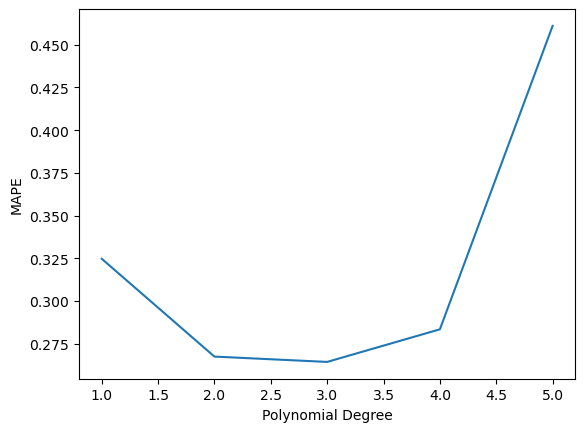

In [56]:
plt.plot(range(1, 5+1), scores)
plt.xlabel("Polynomial Degree")
plt.ylabel("MAPE")
plt.show()

In [57]:
polynomial_features = PolynomialFeatures(degree=3)

In [58]:
train_x = polynomial_features.fit_transform(train_x)
test_x = polynomial_features.transform(test_x)

In [59]:
regressor = LinearRegression()

In [60]:
regressor.fit(train_x, train_y)

LinearRegression()

In [61]:
pred_y = regressor.predict(test_x)

In [62]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5166230986754508
MAPE: 0.3091905628223864
MSE: 8.782101379248418
RMSE: 2.96346104736479
R2 Score: -5.738006700896247


In [63]:
x, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [64]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
regressor = Lasso(alpha=1.0).fit(train_x, train_y)

In [66]:
train_x.columns[regressor.coef_ != 0]

Index(['MedInc', 'HouseAge', 'Population'], dtype='object')

In [67]:
pred_y = regressor.predict(test_x)

In [68]:
regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5).fit(train_x, train_y)

In [69]:
pred_y = regressor.predict(test_x)

In [70]:
x, y = california_housing_df.drop(columns=["MedHouseVal"]), california_housing_df["MedHouseVal"]

In [76]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
regressor = Ridge(alpha=1.0).fit(train_x, train_y)

In [78]:
pred_y = regressor.predict(test_x)

In [79]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 0.5332039182571146
MAPE: 0.31952347060587954
MSE: 0.5558034669932205
RMSE: 0.7455222779992697
R2 Score: 0.5758549611440131


In [81]:
regressor = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5).fit(train_x, train_y)

In [82]:
print(f"Alpha: {regressor.alpha_}")

Alpha: 10.0


In [83]:
pred_y = regressor.predict(test_x)